In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

max_features = 10000
maxlen = 200

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [2]:
def build_and_train_model(model, x_train, y_train, x_test, y_test, epochs=5):
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_split=0.2, verbose=2)
    y_pred = (model.predict(x_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, history


In [3]:
rnn_model = Sequential([
    Embedding(max_features, 32, input_length=maxlen),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])

rnn_accuracy, rnn_history = build_and_train_model(rnn_model, x_train, y_train, x_test, y_test)
print(f"RNN Model Accuracy: {rnn_accuracy:.4f}")

d:\Programming\goid-ds-11\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
313/313 - 22s - 70ms/step - accuracy: 0.6565 - loss: 0.6030 - val_accuracy: 0.6980 - val_loss: 0.5667
Epoch 2/5
313/313 - 17s - 55ms/step - accuracy: 0.8292 - loss: 0.3978 - val_accuracy: 0.7008 - val_loss: 0.6242
Epoch 3/5
313/313 - 17s - 55ms/step - accuracy: 0.9125 - loss: 0.2332 - val_accuracy: 0.7800 - val_loss: 0.5033
Epoch 4/5
313/313 - 17s - 55ms/step - accuracy: 0.9683 - loss: 0.0985 - val_accuracy: 0.8020 - val_loss: 0.5607
Epoch 5/5
313/313 - 20s - 64ms/step - accuracy: 0.9936 - loss: 0.0317 - val_accuracy: 0.8010 - val_loss: 0.6463
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step
RNN Model Accuracy: 0.8011


In [4]:
lstm_model = Sequential([
    Embedding(max_features, 32, input_length=maxlen),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

lstm_accuracy, lstm_history = build_and_train_model(lstm_model, x_train, y_train, x_test, y_test)
print(f"LSTM Model Accuracy: {lstm_accuracy:.4f}")


Epoch 1/5


d:\Programming\goid-ds-11\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 - 39s - 124ms/step - accuracy: 0.7735 - loss: 0.4706 - val_accuracy: 0.8614 - val_loss: 0.3402
Epoch 2/5
313/313 - 35s - 111ms/step - accuracy: 0.8958 - loss: 0.2647 - val_accuracy: 0.8742 - val_loss: 0.3050
Epoch 3/5
313/313 - 34s - 109ms/step - accuracy: 0.9276 - loss: 0.1939 - val_accuracy: 0.8612 - val_loss: 0.3584
Epoch 4/5
313/313 - 34s - 109ms/step - accuracy: 0.9474 - loss: 0.1472 - val_accuracy: 0.8700 - val_loss: 0.3491
Epoch 5/5
313/313 - 34s - 110ms/step - accuracy: 0.9621 - loss: 0.1117 - val_accuracy: 0.8678 - val_loss: 0.4161
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step
LSTM Model Accuracy: 0.8562


In [5]:
bilstm_model = Sequential([
    Embedding(max_features, 32, input_length=maxlen),
    Bidirectional(LSTM(32)),
    Dense(1, activation='sigmoid')
])

bilstm_accuracy, bilstm_history = build_and_train_model(bilstm_model, x_train, y_train, x_test, y_test)
print(f"Bidirectional LSTM Model Accuracy: {bilstm_accuracy:.4f}")


Epoch 1/5


d:\Programming\goid-ds-11\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 - 42s - 135ms/step - accuracy: 0.7467 - loss: 0.4948 - val_accuracy: 0.8394 - val_loss: 0.3743
Epoch 2/5
313/313 - 35s - 111ms/step - accuracy: 0.8915 - loss: 0.2739 - val_accuracy: 0.8708 - val_loss: 0.3149
Epoch 3/5
313/313 - 41s - 131ms/step - accuracy: 0.9288 - loss: 0.1991 - val_accuracy: 0.8450 - val_loss: 0.3640
Epoch 4/5
313/313 - 39s - 125ms/step - accuracy: 0.9456 - loss: 0.1567 - val_accuracy: 0.8716 - val_loss: 0.3608
Epoch 5/5
313/313 - 38s - 122ms/step - accuracy: 0.9572 - loss: 0.1233 - val_accuracy: 0.8624 - val_loss: 0.3459
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step
Bidirectional LSTM Model Accuracy: 0.8566


In [6]:
deep_lstm_model = Sequential([
    Embedding(max_features, 32, input_length=maxlen),
    LSTM(32, return_sequences=True),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

deep_lstm_accuracy, deep_lstm_history = build_and_train_model(deep_lstm_model, x_train, y_train, x_test, y_test)
print(f"Deep LSTM Model Accuracy: {deep_lstm_accuracy:.4f}")


Epoch 1/5


d:\Programming\goid-ds-11\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 - 88s - 280ms/step - accuracy: 0.7929 - loss: 0.4337 - val_accuracy: 0.8624 - val_loss: 0.3341
Epoch 2/5
313/313 - 94s - 301ms/step - accuracy: 0.9026 - loss: 0.2496 - val_accuracy: 0.8696 - val_loss: 0.3065
Epoch 3/5
313/313 - 100s - 318ms/step - accuracy: 0.9313 - loss: 0.1857 - val_accuracy: 0.8728 - val_loss: 0.3195
Epoch 4/5
313/313 - 98s - 312ms/step - accuracy: 0.9467 - loss: 0.1496 - val_accuracy: 0.8700 - val_loss: 0.3519
Epoch 5/5
313/313 - 98s - 312ms/step - accuracy: 0.9620 - loss: 0.1091 - val_accuracy: 0.8662 - val_loss: 0.4158
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step
Deep LSTM Model Accuracy: 0.8507


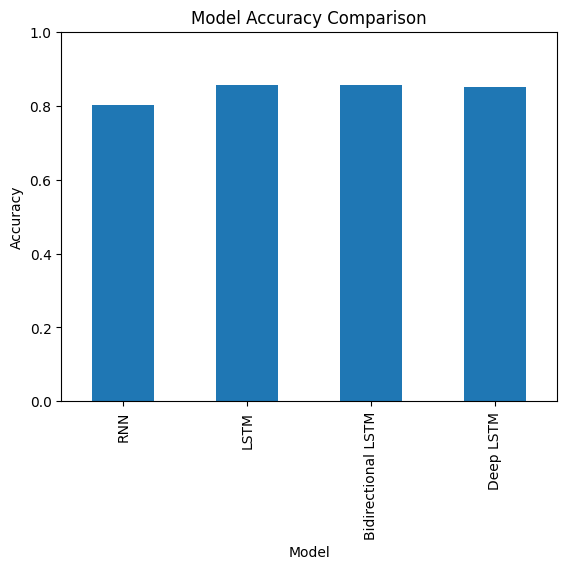

,Model,Accuracy
0,RNN,0.80112
1,LSTM,0.85624
2,Bidirectional LSTM,0.85660
3,Deep LSTM,0.85068


In [7]:
results = {
    'Model': ['RNN', 'LSTM', 'Bidirectional LSTM', 'Deep LSTM'],
    'Accuracy': [rnn_accuracy, lstm_accuracy, bilstm_accuracy, deep_lstm_accuracy]
}

results_df = pd.DataFrame(results)
results_df.plot(kind='bar', x='Model', y='Accuracy', legend=False, title='Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

results_df